# Let's do some Time series analysis and comparing various models to pick the best

In [6]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import pydataset 
import pandas_datareader as pdr 
from statsmodels.graphics.tsaplots import plot_acf 
from statsmodels.tsa.stattools import acf 
from pandas.plotting import autocorrelation_plot 
from statsmodels.formula.api import ols 
from statsmodels.tsa.ar_model import AR 
from statsmodels.tsa.seasonal import seasonal_decompose 
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error 
from statsmodels.tsa.arima_model import ARMA 
from statsmodels.tsa.arima_model import ARIMA 
import statsmodels.tsa
import matplotlib.ticker as plticker
from statsmodels.tsa.stattools import adfuller

C:\Users\18482\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\18482\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [7]:
Prices = pd.read_csv('CurrentPrices.csv') 
Prices.head()

,Date,Current_price
0,1997Q1,149
1,1997Q2,151
2,1997Q3,154
3,1997Q4,155
4,1998Q1,157


In [8]:
Prices.columns=["Date",'Current_price']

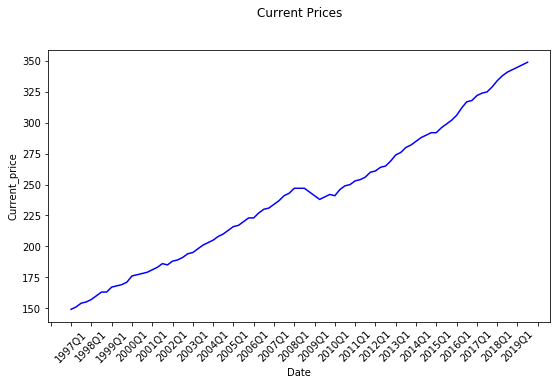

In [9]:
plt.figure(figsize = (9,5))
ax = plt.gca()
plt.plot(Prices.Date ,Prices.Current_price, c='b')
plt.title("Current Prices", y=1.1) 
plt.xlabel("Date") 
plt.ylabel("Current_price")
plt.xticks(rotation=45)
loc = plticker.MultipleLocator(base=4.0) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.show()

# For data with Trend, we can perform Regression analysis for forecasting 

In [10]:
Emp_rate = pd.read_csv('EmploymentRate.csv') 
Emp_rate.head()

,Date,Empl_Rate
0,1971 FEB,72.2
1,1971 MAR,72.1
2,1971 APR,72.0
3,1971 MAY,72.0
4,1971 JUN,71.9


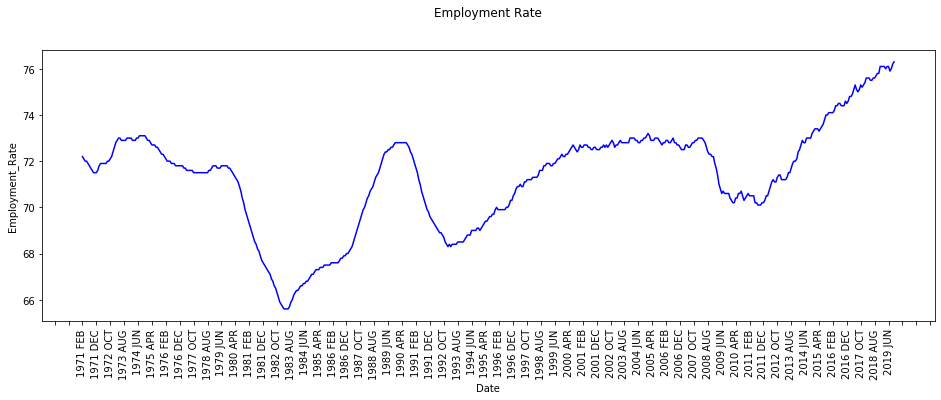

In [11]:
plt.figure(figsize = (16,5))
ax = plt.gca()
plt.plot(Emp_rate.Date ,Emp_rate.Empl_Rate, c='b')
plt.title("Employment Rate", y=1.1) 
plt.xlabel("Date") 
plt.ylabel("Employment_Rate")
plt.xticks(rotation=90)
loc = plticker.MultipleLocator(base=10) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.show()

# For data with Horizontal pattern, we can perform Moving Average Smoothing for forecasting 

In [107]:
Prod_volume = pd.read_csv('ProductionVolume.csv')
Prod_volume.head()

,Date,IOP
0,1995 JAN,89.9
1,1995 FEB,93.3
2,1995 MAR,108.2
3,1995 APR,91.0
4,1995 MAY,101.2


In [108]:
Prod_volume.columns=["Date",'IOP']

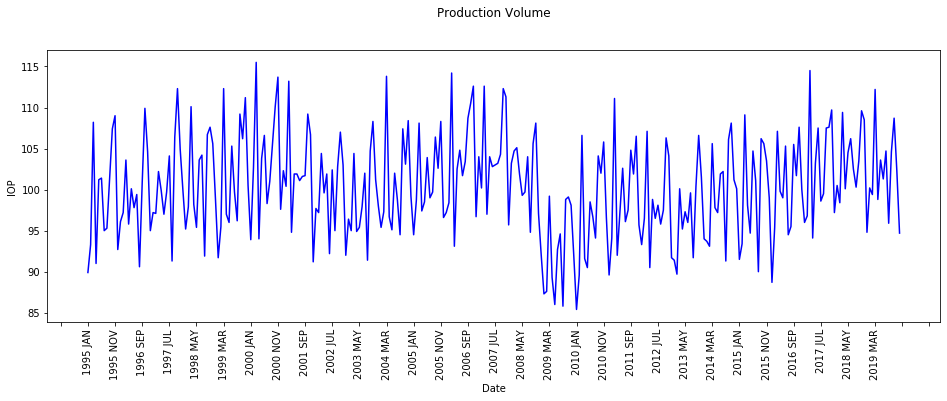

In [109]:
plt.figure(figsize = (16,5))
ax = plt.gca()
plt.plot(Prod_volume.Date,Prod_volume.IOP, c='b')
plt.title("Production Volume", y=1.1) 
plt.xlabel("Date") 
plt.ylabel("IOP")
plt.xticks(rotation=90)
loc = plticker.MultipleLocator(base=10) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.show()

# For Cyclic data, we can perform Exponential Smoothing for forecasting 

In [15]:
Sales = pd.read_csv('Sales.csv') 
Sales.head()

,Date,Sales
0,2007 JAN,240
1,2007 FEB,235
2,2007 MAR,232
3,2007 APR,178
4,2007 MAY,180


In [16]:
Sales.columns=["Date",'Sales']

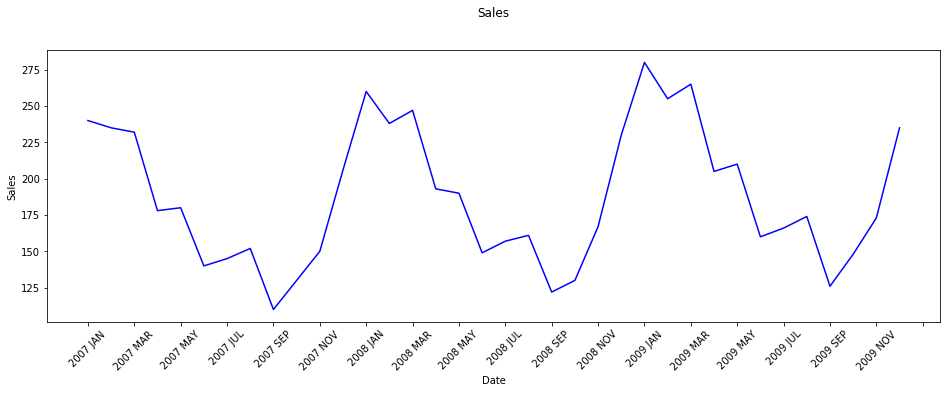

In [17]:
plt.figure(figsize = (16,5))
ax = plt.gca()
plt.plot(Sales.Date ,Sales.Sales, c='b')
plt.title("Sales", y=1.1) 
plt.xlabel("Date") 
plt.ylabel("Sales")
plt.xticks(rotation=45)
loc = plticker.MultipleLocator(base=2) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.show()

# For data that has Seasonality along with trend, we can perform Regression with Dummy Variables for forecasting 




# To check for stationarity in data we can plot the autocorrelation function 

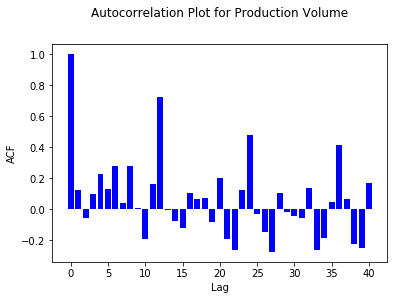

In [110]:
autocorr = acf(Prod_volume.IOP, nlags=40, fft=False)
plt.bar(range(len(autocorr)), autocorr, color="b") 
plt.title("Autocorrelation Plot for Production Volume", y=1.1) 
plt.xlabel("Lag") 
plt.ylabel("ACF");

We can see that the mean is zero over time which confirms that the data is stationary. 

# We can use seasonal_decompose( ) function nested inside the time series module in statsmodels to decompose the time series data into its various components such as trend, seasonality, etc, all at once

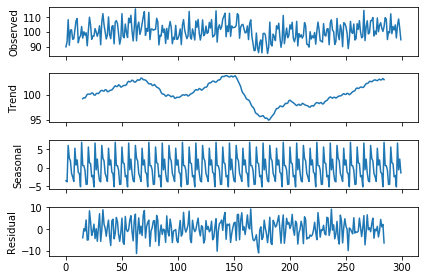

In [111]:
decomp = seasonal_decompose(Prod_volume["IOP"],model='additive', freq=30) 
decomp.plot();

We can see that there is a cyclical pattern, because there seems to be a repeating pattern but no fixed period.

# Conduct the Augmented Dickey-Fuller statistical test for stationarity. 

The null hypothesis of this test is that, the time series data is not stationary

In [112]:
result = adfuller(Prod_volume.IOP)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.075364
p-value: 0.001063
Critical Values:
	1%: -3.454
	5%: -2.872
	10%: -2.572


As the P-Value is less than the significant (0.05), we can be sure that this data is stationary.

# Split the data into training and test set. Your test set should be made up of the last 12 months of data while the training set is the rest of the previous data before the last twelve months

Note that for a time series data, you cannot randomly split the data because the training set must be made up of data in previous time period while the test dataset represents a future time period relative to the training set, so that you can use past data to predict future data. So, you need to manually split the data using your own code instead of using a package such as sklearn which randomly splits the data

In [113]:
X = Prod_volume.IOP.dropna()
X = X.values # extract only values without indexes 
n = len(X) 

In [114]:
train_data = X[1:n-11] 
test_data = X[n-11:]

Lets fit the Training data to three separate models, AR(p) and MA(q),  and ARMA(p, q) models using the ARMA( ) function in statsmodels.

In [115]:
Model_AR = ARMA(train_data, order=(4,0)).fit(disp=False)
Model_MA = ARMA(train_data, order=(0,4)).fit(disp=False)
Model_ARMA = ARMA(train_data, order=(4,4)).fit(disp=False)

C:\Users\18482\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [116]:
Model_AR.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  288
Model:                     ARMA(4, 0)   Log Likelihood                -918.490
Method:                       css-mle   S.D. of innovations              5.870
Date:                Mon, 04 May 2020   AIC                           1848.980
Time:                        16:17:10   BIC                           1870.958
Sample:                             0   HQIC                          1857.788
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.3122      0.515    194.786      0.000      99.303     101.322
ar.L1.y        0.1157      0.058      1.997      0.047       0.002       0.229
ar.L2.y       -0.0700      0.058     -1.201      0.231      -0.184       0.044
ar.L3.y        0.0921      0.059      1.567      0.118      -0.023       0.207
ar.L4.y        0.1941      0.059      3.312      0.001       0.079       0.309
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3910           -0.0000j            1.3910           -0.0000
AR.2           -0.0430           -1.4421j            1.4427           -0.2547
AR.3           -0.0430           +1.4421j            1.4427            0.2547
AR.4           -1.7797           -0.0000j            1.7797           -0.5000
-----------------------------------------------------------------------------
"""

In [117]:
Model_MA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  288
Model:                     ARMA(0, 4)   Log Likelihood                -907.705
Method:                       css-mle   S.D. of innovations              5.637
Date:                Mon, 04 May 2020   AIC                           1827.409
Time:                        16:17:11   BIC                           1849.387
Sample:                             0   HQIC                          1836.217
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.3098      0.492    203.754      0.000      99.345     101.275
ma.L1.y       -0.0128      0.048     -0.265      0.791      -0.108       0.082
ma.L2.y       -0.2766      0.047     -5.846      0.000      -0.369      -0.184
ma.L3.y        0.1993      0.056      3.555      0.000       0.089       0.309
ma.L4.y        0.5803      0.059      9.805      0.000       0.464       0.696
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            0.8009           -0.7376j            1.0888           -0.1185
MA.2            0.8009           +0.7376j            1.0888            0.1185
MA.3           -0.9726           -0.7125j            1.2056           -0.3994
MA.4           -0.9726           +0.7125j            1.2056            0.3994
-----------------------------------------------------------------------------
"""

In [118]:
Model_ARMA.summary()

C:\Users\18482\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))
C:\Users\18482\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\18482\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\18482\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  288
Model:                     ARMA(4, 4)   Log Likelihood                -869.086
Method:                       css-mle   S.D. of innovations              4.853
Date:                Mon, 04 May 2020   AIC                           1758.172
Time:                        16:17:11   BIC                           1794.801
Sample:                             0   HQIC                          1772.851
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.3533      0.889    112.923      0.000      98.611     102.095
ar.L1.y       -0.0525      0.001    -65.946      0.000      -0.054      -0.051
ar.L2.y       -0.0533      0.000   -463.973      0.000      -0.054      -0.053
ar.L3.y       -0.0538      0.001    -74.161      0.000      -0.055      -0.052
ar.L4.y        0.9467        nan        nan        nan         nan         nan
ma.L1.y        0.1709      0.013     12.789      0.000       0.145       0.197
ma.L2.y        0.1770      0.024      7.449      0.000       0.130       0.224
ma.L3.y        0.1665      0.014     12.173      0.000       0.140       0.193
ma.L4.y       -0.8234      0.023    -35.412      0.000      -0.869      -0.778
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0001           -0.0000j            1.0001           -0.5000
AR.2            0.0003           -1.0000j            1.0000           -0.2499
AR.3            0.0003           +1.0000j            1.0000            0.2499
AR.4            1.0562           -0.0000j            1.0562           -0.0000
MA.1           -1.0045           -0.0000j            1.0045           -0.5000
MA.2           -0.0012           -1.0000j            1.0000           -0.2502
MA.3           -0.0012           +1.0000j            1.0000            0.2502
MA.4            1.2090           -0.0000j            1.2090           -0.0000
-----------------------------------------------------------------------------
"""

# Let's use the fitted model to find the predicted values (predictions) of the test dataset for each of the AR, MA, ARMA models.  Then use the predictions and the actual test dataset to compute Mean Squared Error (MSE) for each model.

In [119]:
predict_AR = Model_AR.predict(start=len(train_data),end=len(train_data) + len(test_data)-1,dynamic=False)
predict_MA = Model_MA.predict(start=len(train_data),end=len(train_data) + len(test_data)-1,dynamic=False)
predict_ARMA = Model_ARMA.predict(start=len(train_data),end=len(train_data) + len(test_data)-1,dynamic=False)

In [120]:
mean_squared_error(test_data, predict_AR)

26.308159462548733

In [121]:
mean_squared_error(test_data, predict_MA)

27.120521822008126

In [122]:
mean_squared_error(test_data, predict_ARMA)

12.556208021728565

# We see that the MSE for ARMA model is the least therefore this is the best model for the given data. This can be verified by plotting the actual vs predicted values.

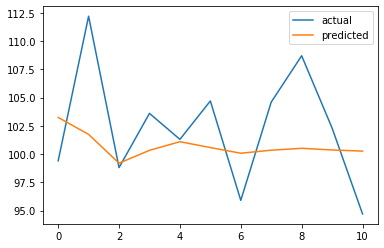

In [123]:
test_pred_AR = pd.concat([pd.DataFrame(test_data),pd.DataFrame(predict_AR)], axis="columns")
test_pred_AR.columns = ["actual", "predicted"] 
test_pred_AR.plot();

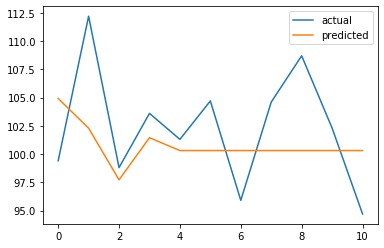

In [124]:
test_pred_MA = pd.concat([pd.DataFrame(test_data),pd.DataFrame(predict_MA)], axis="columns")
test_pred_MA.columns = ["actual", "predicted"] 
test_pred_MA.plot();

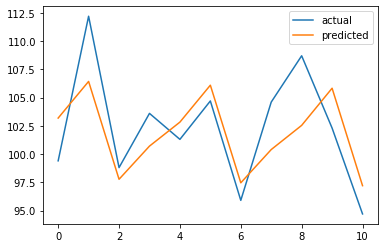

In [125]:
test_pred_ARMA = pd.concat([pd.DataFrame(test_data),pd.DataFrame(predict_ARMA)], axis="columns")
test_pred_ARMA.columns = ["actual", "predicted"] 
test_pred_ARMA.plot();

# Model Diagnostic Checking 

# Statistical model for time series requires the time series data to be stationary. For stationarity to be met, certain assumptions should be satisfied, including:
1.	Residuals (errors) are independent. That is, there is no autocorrelation between the errors. 
2.	Mean of residuals is constant over time  
3.	Variance of residuals is constant over time 
4.	The residuals are normally distributed

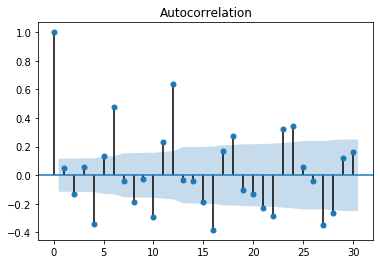

In [126]:
residuals = Model_ARMA.resid
plot_acf(residuals,lags=30);

we can see few residuals are outside the 95% confidence interval.

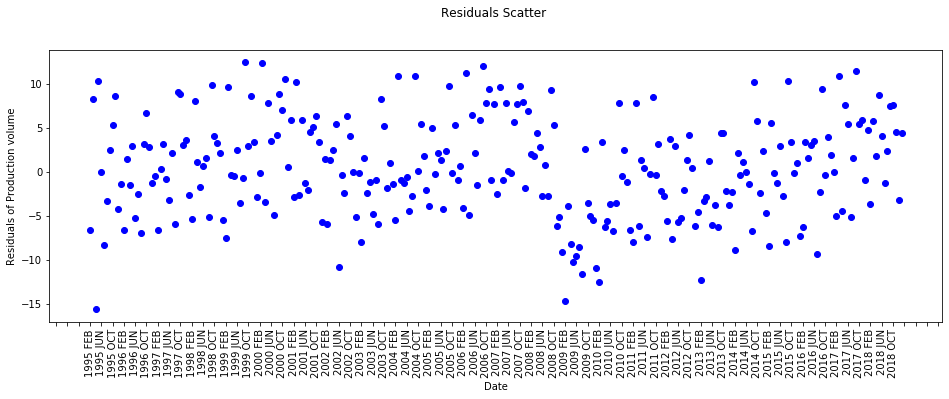

In [32]:
Y = Prod_volume.Date.dropna()
Y = Y.values
n=len(Y)
Y = Y[1:n-11]
plt.figure(figsize = (16,5))
ax = plt.gca()
plt.scatter(Y,residuals, c="b")
plt.title("Residuals Scatter ", y=1.1) 
plt.xlabel("Date") 
plt.ylabel("Residuals of Production volume")
plt.xticks(rotation=90)
loc = plticker.MultipleLocator(base=4) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.show()

Yes the residuals look to have a constant mean and variance. 

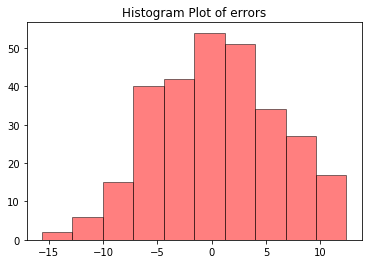

In [33]:
plt.hist(Model_ARMA.resid,edgecolor='black',facecolor='red', alpha=0.5)
plt.title("Histogram Plot of errors")
plt.show();

The histogram indicates that the residuals are approximately normally distributed with a mean around zero.

# Let's predict the production volume for Jan 2020

In [127]:
future_forecast=Model_ARMA.forecast()[0]

In [128]:
future_forecast

array([103.18608336])